In [1]:
%%capture
from lightkurve import KeplerTargetPixelFile
import matplotlib.pyplot as plt
%matplotlib inline
kic = '6679295'
import numpy as np

In [2]:
tpfs = []
for q in range(1,18):
    #Note some quarters are missing, so we'll use Python's try/except to avoid crashing
    try:
        tpfs.append(KeplerTargetPixelFile.from_archive(kic, quarter=q))
    except:
        continue

In [3]:
tpfs

[KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295),
 KeplerTargetPixelFile Object (ID: 6679295)]

In [4]:
pipeline_lc = tpfs[0].to_lightcurve().flatten()
for tpf in tpfs:
    pipeline_lc = pipeline_lc.append(tpf.to_lightcurve().flatten())
pipeline_lc = pipeline_lc.remove_nans().remove_outliers()

/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:292: RuntimeWarning: invalid value encountered in true_divide
  flatten_lc.flux = flatten_lc.flux / trend_signal
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:293: RuntimeWarning: invalid value encountered in true_divide
  flatten_lc.flux_err = flatten_lc.flux_err / trend_signal


In [5]:
#np.where(pipeline_lc.pos_corr1 == 0.0)

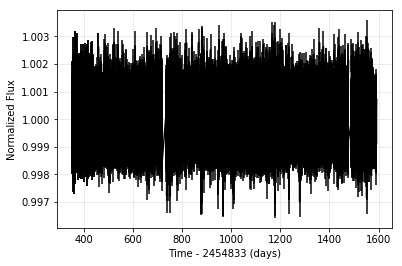

In [6]:
 pipeline_lc.plot()

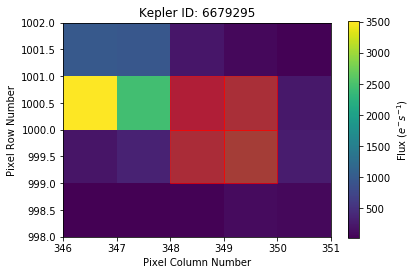

In [7]:
tpf.plot(frame=100, aperture_mask=tpf.pipeline_mask, mask_color='red')

In [1]:
aper = np.zeros(tpf.shape[1:])
aper[-1:, 0:1] = 1
tpf.plot(aperture_mask=aper, mask_color='red')

NameError: name 'np' is not defined

/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:292: RuntimeWarning: invalid value encountered in true_divide
  flatten_lc.flux = flatten_lc.flux / trend_signal
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:293: RuntimeWarning: invalid value encountered in true_divide
  flatten_lc.flux_err = flatten_lc.flux_err / trend_signal


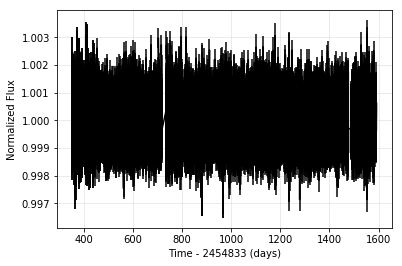

In [9]:
#Build the NEW aperture, and the light curve
aper = np.zeros(tpfs[0].shape[1:])
aper[-2:, 0:2] = 1
user_lc = tpfs[0].to_lightcurve(aperture_mask=aper.astype(bool)).flatten()
for tpf in tpfs:
    aper = np.zeros(tpf.shape[1:])
    aper[-2:, 0:2]=1
    user_lc = user_lc.append(tpf.to_lightcurve(aperture_mask=aper.astype(bool)).flatten())

#Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()
user_lc.plot()

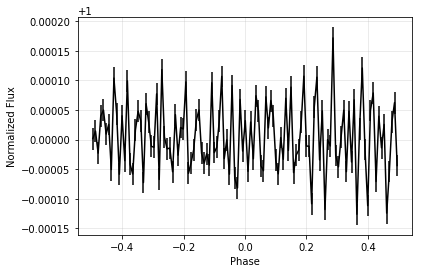

In [10]:
user_lc.fold(period=24.57537, phase=-0.133).bin(500).plot();

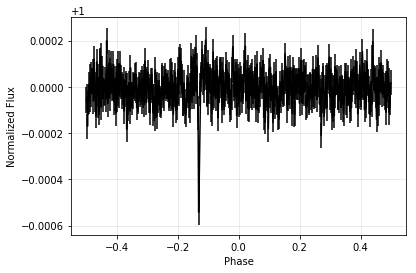

In [11]:
pipeline_lc.fold(period=24.5737).bin(100).plot()

In [12]:
from astropy.stats import LombScargle

In [13]:
t = pipeline_lc.time
y = pipeline_lc.flux

In [14]:
frequency, power = LombScargle(t,y).autopower()
1/frequency[np.argmax(power)]

0.02085996637227446

In [15]:
t1 = user_lc.time
y1 = user_lc.flux

In [16]:
frequency1, power1 = LombScargle(t1,y1).autopower()
1/(frequency1[np.argmax(power1)])

0.02122398109053936

(0, 25)

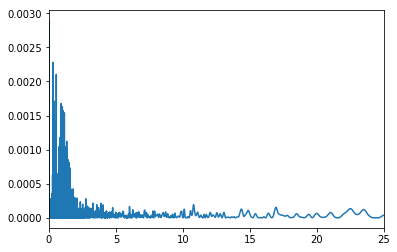

In [17]:
plt.plot(1/frequency1, power1)
plt.xlim(0, 25)